# A-Star Search Algorithm

This notebook complements the walkthrough article [here](https://towardsdatascience.com/a-star-a-search-algorithm-eb495fb156bb) on the A-Star search algorithm. Throughout the notebook, we ask to you finish sections on your own and answer questions.

## [Question - Describe A*]
Describe A* search in your own words.

A* Search is a highly effective pathfinding and graph traversal algorithm that combines the benefits of Dijkstra's algorithm and Best-First Search, making it a popular choice in various applications where optimal paths need to be determined efficiently.

It is an informed search algorithm that combines features of both Dijkstra’s algorithm (which focuses on finding the shortest path) and Best-First Search (which uses heuristics). A* is widely used in various applications, including artificial intelligence, robotics, and game development, to efficiently find the optimal path from a start node to a goal node.
Key Features of A* Search:

    Evaluation Function: A* uses a heuristic function to evaluate nodes. The evaluation function f(n)f(n) is defined as:
    f(n)=g(n)+h(n)
    f(n)=g(n)+h(n)
        g(n)g(n): The cost from the start node to the current node nn.
        h(n)h(n): The heuristic estimate of the cost from the current node nn to the goal node. It should be admissible, meaning it never overestimates the actual cost to reach the goal.

Priority Queue: A* uses a priority queue to keep track of nodes that need to be explored. Nodes are expanded based on their f(n)f(n) values, with the lowest f(n)f(n) being explored first.

Completeness: A* is complete, meaning it will find a solution if one exists, provided that the heuristic used is admissible and the search space is finite.

Optimality: A* is optimal when the heuristic h(n)h(n) is admissible and consistent (or monotonic). This means it will always find the least-cost path to the goal.


Advantages:

Efficiency: A* is generally more efficient than uninformed search methods because it intelligently directs its search based on heuristic estimates.
Flexibility: The performance of A* can be improved by using different heuristics tailored to specific problems.
Guaranteed Optimality: When using an admissible heuristic, A* guarantees the optimal path.

Disadvantages:

Memory Usage: A* can consume a large amount of memory since it keeps track of all explored nodes and nodes to be explored.
Heuristic Dependence: The performance of A* is heavily dependent on the choice of heuristic. A poorly chosen heuristic can lead to inefficient searches.

Applications:

Navigation Systems: A* is widely used in GPS and mapping applications to find the shortest path between locations.
Game Development: Many games use A* for AI movement and pathfinding for characters and units.
Robotics: A* can be used for robot navigation in environments with obstacles.

## [Question - Describe h and g]
In A* search, describe the two key elements of *f(n)* (namely *h(n)* and *g(n)*). What do they represent in the algorithm and how do they differ?

In the A* search algorithm, the evaluation function f(n)f(n) is central to guiding the search process towards the goal efficiently. The function is defined as:
f(n)=g(n)+h(n)
f(n)=g(n)+h(n)

where:

    g(n)g(n): Represents the cost from the start node to the current node nn.
    h(n)h(n): Represents the heuristic estimate of the cost from the current node nn to the goal node.

Detailed Description of Each Element:
1. g(n)g(n) - Actual Cost from Start to Node nn

  Definition: g(n)g(n) is the cumulative cost incurred to reach node nn from the starting node. This cost is typically the sum of the weights or distances of the edges traversed along the path from the start node to nn.

  Characteristics:
        Non-Decreasing: As the algorithm progresses, g(n)g(n) should never decrease, meaning that once a node is expanded, its cost is fixed. This ensures that the algorithm builds a valid path from the start to the current node.
        Path Specific: g(n)g(n) reflects the specific path taken to reach nn and is an exact measure of the cost incurred so far.

  Role in A*: g(n)g(n) plays a crucial role in determining how costly it is to reach a particular node. It provides the algorithm with a way to account for the actual cost of reaching nodes as it explores the search space.

2. h(n)h(n) - Heuristic Estimate to Goal

   Definition: h(n)h(n) is a heuristic function that estimates the cost from the current node nn to the goal node. It provides an informed guess about how much more cost is likely needed to reach the goal from nn.

  Characteristics:
      Admissibility: For A∗A∗ to be optimal, the heuristic h(n)h(n) must be admissible. This means it should never overestimate the actual cost to reach the goal. If h(n)h(n) is admissible, the algorithm guarantees finding the shortest path to the goal.
      Domain-Specific: Heuristics are often tailored to the specific problem domain and can vary in their effectiveness. A good heuristic can significantly speed up the search process, while a poor one can lead to inefficiency.

  Role in A*: h(n)h(n) provides the algorithm with guidance on which nodes are likely to lead to a solution more quickly. By estimating the remaining cost to reach the goal, h(n)h(n) helps prioritize the expansion of nodes that appear to be more promising.





g(n)g(n) and h(n)h(n) are two key components of the A* search algorithm that serve distinct yet complementary purposes. While g(n)g(n) tracks the actual cost incurred to reach a node from the start, h(n)h(n) provides an estimate of the cost to reach the goal from that node. The combination of these two elements in the evaluation function f(n)f(n) allows A* to efficiently navigate through the search space and find the optimal path to the goal.


## [Activity - run Node]
Examine and run the below code.

In [1]:

class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

## [Question - Explain 'Node']
In your own words, describe what the purpose of the *Node* class is. Why do we have to initialize a parent and a position?

The Node class in the context of A* pathfinding serves as a fundamental building block for representing each position (or state) in the search space.

##Purpose of the Node Class

####Representation of State: Each instance of the Node class represents a specific state or position in the grid or graph being explored during the pathfinding process. This state is defined by its position in the search space.

####Path Tracking: The Node class keeps track of the path taken to reach a particular state. By maintaining a reference to its parent node, it enables the reconstruction of the path from the start node to the goal node once the pathfinding algorithm completes.

####Cost Calculations: The class includes properties gg, hh, and ff:
        gg: The cost from the start node to the current node. This is the cumulative cost incurred to reach that node.
        hh: The heuristic estimate of the cost from the current node to the goal node.
        ff: The total estimated cost of the cheapest solution through the current node, calculated as f=g+hf=g+h. This value is used to prioritize node expansion in the A* algorithm.

parent:

  Purpose: The parent attribute references the node that led to the current node. It is essential for backtracking the path from the goal node to the start node.
  Importance: By storing the parent node, we can reconstruct the optimal path once the search is complete. When a node is determined to be part of the optimal path, its parent is also marked as such, creating a chain of nodes that represent the complete path taken.

position:

  Purpose: The position attribute defines the node's location in the search space (e.g., grid coordinates in a 2D space). It serves as a unique identifier for the node within the search algorithm.
  Importance: The position is crucial for navigating the search space. It allows the algorithm to determine neighboring nodes, check for obstacles, and manage the overall pathfinding process effectively. Each node's position helps the algorithm evaluate possible moves and expand nodes based on their proximity to the goal.

   All in all, Node class is a critical component of the A* pathfinding algorithm, encapsulating the necessary information about each state in the search space. Initializing the parent and position attributes allows for efficient path tracking and navigation through the search space, enabling the algorithm to construct the optimal path from the start node to the goal node after completion.

## [Activity - Run astar() ]

In [35]:
import matplotlib.pyplot as plt
from warnings import warn


class Node:
    """
    A node class for A* Pathfinding
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]  # Return reversed path

In [36]:
def astar(maze, start, end, allow_diagonal_movement=False):
    """
    Returns a list of tuples as a path from the given start to the given end in the given maze
    """

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Adding a stop condition
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 2

    # what squares do we search
    adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),)
    if allow_diagonal_movement:
        adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1),)

    # Loop until you find the end
    while len(open_list) > 0:
        outer_iterations += 1

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        if outer_iterations > max_iterations:
            warn("giving up on pathfinding too many iterations")
            return return_path(current_node)

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            return return_path(current_node)

        # Generate children
        children = []

        for new_position in adjacent_squares:  # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            within_range_criteria = [
                node_position[0] > (len(maze) - 1),
                node_position[0] < 0,
                node_position[1] > (len(maze[len(maze) - 1]) - 1),
                node_position[1] < 0,
            ]

            if any(within_range_criteria):
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + \
                       ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            if len([open_node for open_node in open_list if child == open_node and child.g > open_node.g]) > 0:
                continue

            # Add the child to the open list
            open_list.append(child)


def plot_path(maze, path, start, end):
    """
    Visualizes the maze and the path.
    :param maze: 2D grid representing the maze
    :param path: List of tuples representing the path
    :param start: Starting position
    :param end: Ending position
    """

    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap="gray_r")  # Display maze (1=wall, 0=free space)

    # Plot path
    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, color="red", linewidth=2, label="Path")

    # Mark start and end points
    plt.scatter(start[1], start[0], color="green", s=100, label="Start")  # Green for start
    plt.scatter(end[1], end[0], color="blue", s=100, label="End")  # Blue for end

    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

## [Question - Explain maze]
What type of input should value of *maze* be?

it should be 2D a matrix that with 0 and 1 flags representing closing and opening of the path

## [Question - Build Main]
Please use the above code that uses the astar() function to define a path from the beginning to the end of a maze. You can choose how the maze looks and where the start and end are.

Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7), (9, 8), (9, 9)]


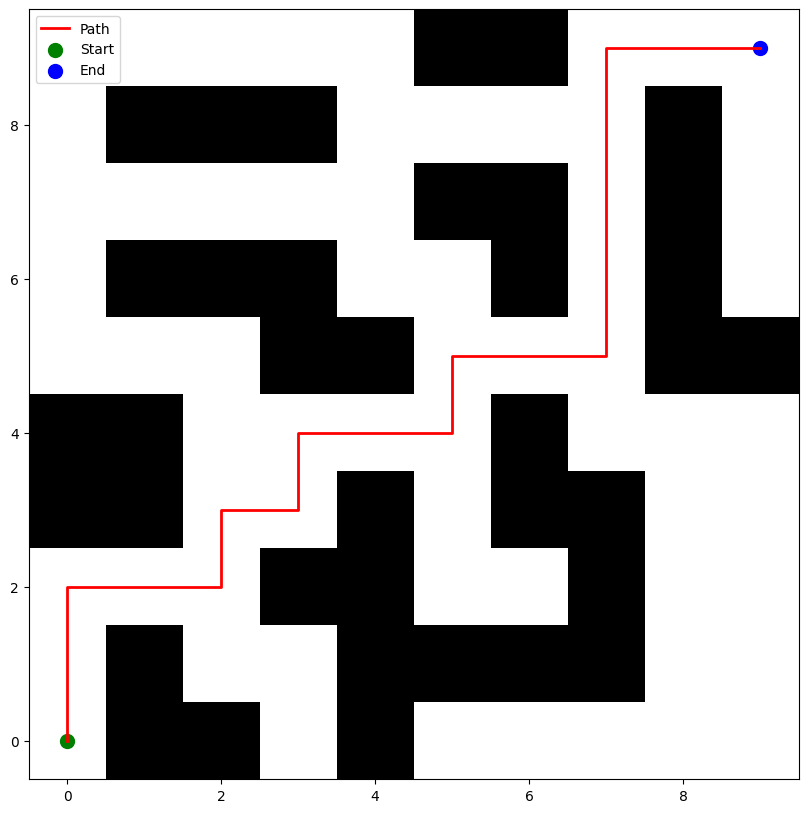

In [39]:
def main():
    maze = [[0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 1, 1, 1, 1, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
            [1, 1, 0, 0, 1, 0, 1, 1, 0, 0],
            [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 1, 1],
            [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
            [0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]]

    start = (0, 0)
    end = (9, 9)

    path = astar(maze, start, end, allow_diagonal_movement=False)
    print(f"Path: {path}")

    # Visualize the path
    plot_path(maze, path, start, end)


if __name__ == "__main__":
    main()


## [Question - Impossible Maze]
Now create a maze that the algorithm cannot solve. What is the output of the algorithm?

No path found!


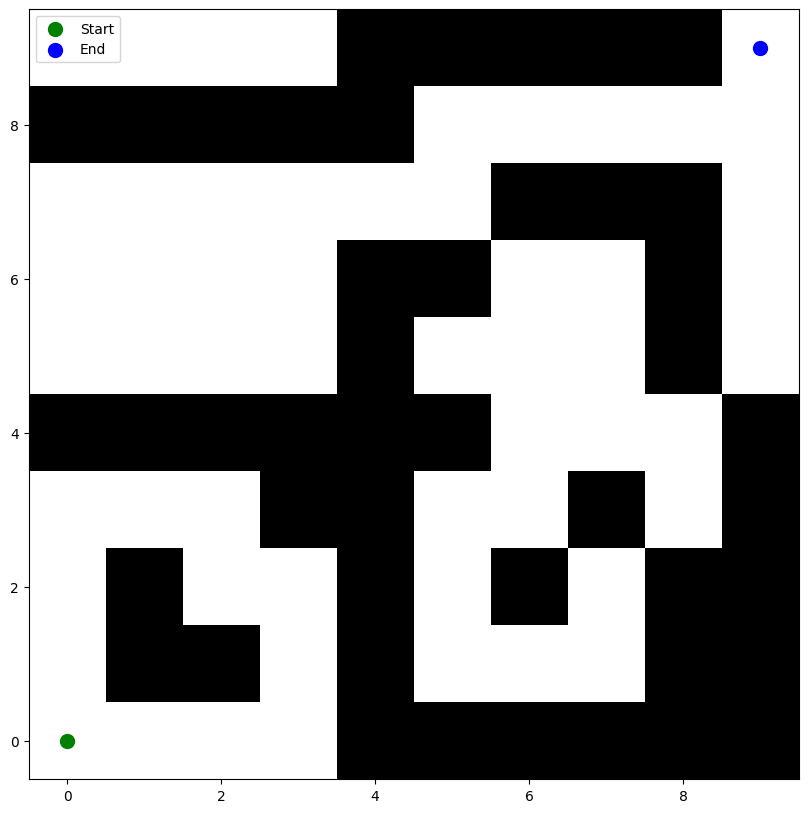

In [48]:
def main_unsolvable():
    # A more complex unsolvable maze
    maze = [[0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
            [0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
            [0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
            [1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
            [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]]

    start = (0, 0)
    end = (9, 9)

    path = astar(maze, start, end, allow_diagonal_movement=False)
    if not path:
        print("No path found!")
    else:
        print(f"Path: {path}")

    # Visualize the path (even if no path is found)
    plot_path(maze, path, start, end)


if __name__ == "__main__":
    main_unsolvable()
